In [21]:
import pandas as pd
import numpy as np
import datetime as dt
from tqdm import tqdm

In [2]:
df_trans = pd.read_csv('/tmp/.fr-2qZZCD/transactions_last_2.csv', delimiter=';', nrows=10e6)
print(df_trans.shape)
df_trans.head()

(10000000, 6)


,purchdate,amount,mcc,mrchcity,mrchname,cnum
0,2019-11-02 00:00:00,9000000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ
1,2019-11-02 00:00:00,9000000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ
2,2019-10-25 00:00:00,7716900.0,5691,MOSCOW,HXL4K TL4EEXD,ELETCO
3,2019-11-29 00:00:00,5100000.0,6513,SANKT-PETERBU,7X 1E7HXD H1DKW1IKCL,EL0KSF
4,2019-12-03 00:00:00,5023956.6,5944,MOSKVA,73 7HJXK7 (W7X),MPKIJJ


In [3]:
df_cc = pd.read_csv('client_categories.csv', delimiter=';')
print(df_cc.shape)
df_cc.head()

(27, 2)


,category,description
0,10,VIP/ Management recommendations
1,11,VIP/ Management recommendations (family)
2,17,Private Banking customers walk-in
3,18,Private banking customers payroll
4,20,High income individuals


In [4]:
df_cf = pd.read_csv('clients_last_2_fixed.csv', delimiter=';')
print(df_cf.shape)
df_cf.head()

(1355925, 6)


,cnum_,categorycode,gender,age,married_,residenttype
0,0CCCDO,81,M,32,not_married,R
1,0CCCFO,70,F,42,not_married,R
2,0CCCGC,50,F,33,married,R
3,0CCCGG,70,M,58,not_married,R
4,0CCCGO,60,M,38,married,R


In [5]:
df_mcc = pd.read_excel('MCC.xlsx', delimiter=';')
print(df_mcc.shape)
df_mcc.head()

(896, 2)


,mcc,category
0,742,Pet
1,763,Other
2,780,Maintenance and building
3,1520,Maintenance and building
4,1711,Maintenance and building


In [6]:
df_mccl = pd.read_excel('MCC_last.xlsx', delimiter=';')
print(df_mccl.shape)
df_mccl.head()

(925, 2)


,mcc,category
0,742,Pet
1,763,Other
2,780,Maintenance and building
3,1520,Maintenance and building
4,1711,Maintenance and building


In [7]:
df_s = pd.read_csv('skidki.csv', delimiter=';', engine='python')
print(df_s.shape)
df_s.head()

(52, 8)


,partner_name,offer_name,category,percents_,selltype,city_name,comment,enddate
0,Teana,Tean�,���������� � ���������,10.0,Online,NaN,����������� ������������� ������ � ��������-��...,2021-10-01 03:00:00
1,Prime Travel,Prime Travel,�����������,5.0,Online,NaN,������ � ������� �������.����� ���������� ����...,2020-12-31 03:00:00
2,Special Travel Club,Special Travel Club,�����������,12.0,Online,NaN,NaN,2020-12-31 03:00:00
3,Hotels.com,Hotels.com,�����������,10.0,NaN,NaN,"�������� ��������� ������ �� �����, ����������...",2020-12-31 03:00:00
4,������.����,������.����,����� � �����������,NaN,Online,NaN,90 ���� �������� ������.����. ��������� �� ���...,2020-12-31 03:00:00


In [8]:
df_sl = pd.read_csv('store_last_2.csv', delimiter=';', engine='python')
print(df_sl.shape)
df_sl.head()

(503285, 2)


,store_name,merchant_name
0,��������,VVVVVVVVVVVVSG/W7J4K 07ZL
1,����,VVVVVVVVVVVVR4U4 CXD1O
2,��������,VVVVVVVVVVV/078 WXWLH7J K
3,��������,VVVVVVVVVVV/08 7JJ4T7H AK
4,��������,VVVVVVVVVVV1SV6


In [9]:
df_trans = df_trans.merge(df_mcc, on='mcc', how='inner')
df_trans = df_trans.merge(df_sl, left_on='mrchname', right_on='merchant_name')
print(df_trans.shape)
df_trans.head()

(4187626, 9)


,purchdate,amount,mcc,mrchcity,mrchname,cnum,category,store_name,merchant_name
0,2019-11-02 00:00:00,9000000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,Clothes,Chanel,IA7D1H Z1D1T7
1,2019-11-02 00:00:00,9000000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,Clothes,Chanel,IA7D1H Z1D1T7
2,2019-11-02 00:00:00,5000000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,Clothes,Chanel,IA7D1H Z1D1T7
3,2019-11-02 00:00:00,5000000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,Clothes,Chanel,IA7D1H Z1D1T7
4,2019-12-10 00:00:00,2371100.0,5691,MOSCOW,IA7D1H Z1D1T7,EEQ4VM,Clothes,Chanel,IA7D1H Z1D1T7


In [10]:
df_trans.category.value_counts()

Other                        2079940
Supermarkets                  547866
Clothes                       391317
Tourism                       166757
Payments                      161348
Furniture, home               121088
Medical                        84960
Soft                           83896
Beauty                         77101
Restaurants                    61591
Sport                          58773
Cultural life                  49985
Kids                           45341
Railway and sea transport      43731
Legal and  insurance           27473
Auto                           26604
Maintenance and building       24503
Parking&Fuel                   22515
Discount                       16566
Postal services, delivery      15741
Fast Food                      13237
Alcohol and tobacco            11680
Pet                             8875
Providers                       7890
Money                           6631
Design, print                   5839
Local and autotransport         5274
E

In [67]:
df_trans[df_trans.category == 'Supermarkets'].store_name.value_counts()

�����                           124305
����                             69044
������ �����                     50801
Metro Cash&Carry                 38641
�����������                      29642
                                 ...  
����� ���� ������                    1
�������� 2                           1
Super �����                          1
�� ����                              1
��������� ������� ����������         1
Name: store_name, Length: 644, dtype: int64

In [69]:
store_name = 'Metro Cash&Carry'

In [14]:
df_trans['created_at'] = df_trans.purchdate.apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [118]:
df_trans.created_at.max()

Timestamp('2019-12-20 00:00:00')

In [28]:
df_trans.sort_values(by=['store_name', 'created_at'], inplace=True)

In [54]:
dates_sorted = sorted(df_trans.created_at.apply(lambda x: x.replace(day=1)).unique())
len(dates_sorted)

4

In [70]:
#dates_sorted = df_trans.created_at.sort_values().unique()
#dates_sorted = sorted(set([d.replace(day=1) for d in dates_sorted if isinstance(d, )]))

#dates_sorted = sorted(dates_sorted.created_at.apply(lambda x: x.replace(day=1)).unique())

res = pd.DataFrame(np.zeros((len(dates_sorted), len(dates_sorted))), columns=list(range(len(dates_sorted))), index=dates_sorted)

unique_users = list()
dates = list()

for idx, row in tqdm(df_trans[df_trans.store_name == store_name].iterrows()):
    created_at = row.created_at.replace(day=1)
    if row.cnum not in unique_users:
        unique_users.append(row.cnum)
        dates.append(created_at)
    else:
        #print(unique_users.index(row['cnum']))
        #print(row['created_at'])
        #print(dates[unique_users.index(row['cnum'])])
        #print((row['created_at'] - dates[unique_users.index(row['cnum'])]).days)
        res.loc[dates[unique_users.index(row['cnum'])], int((created_at - dates[unique_users.index(row['cnum'])]).days / 31)] += 1

38653it [00:36, 1066.77it/s]


In [71]:
res

,0,1,2,3
2019-09-01,5192.0,3907.0,2226.0,0.0
2019-10-01,2033.0,4687.0,0.0,0.0
2019-11-01,2097.0,0.0,0.0,0.0
2019-12-01,623.0,0.0,0.0,0.0


In [74]:
res.sum(axis=0) / res.sum(axis=0).max()

0    1.000000
1    0.864153
2    0.223831
3    0.000000
dtype: float64

In [97]:
print(row['created_at'])
print(dates[unique_users.index(row['cnum'])])


2019-10-12 00:00:00
2019-12-01 00:00:00


In [100]:
df_plot = pd.DataFrame(res.sum(axis=0) / res.sum(axis=0).max(), columns=['%'])
df_plot['week_delta'] = range(len(df_plot))
df_plot

,%,week_delta
0,1.000000,0
1,0.864153,1
2,0.223831,2
3,0.000000,3


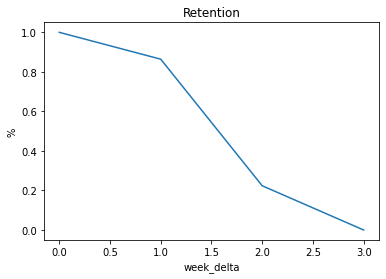

In [101]:
import seaborn as sns

ax = sns.lineplot(data=df_plot, x='week_delta', y='%');
ax.set_title('Retention');